In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [3]:
df=pd.read_csv('./winequality-total.csv')
df.head()

,Color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red=df.loc[df.Color=='Red']
red.head()

,Color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


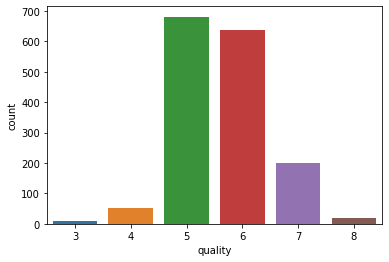

In [5]:
sns.countplot(x='quality',data=red)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c8c7f10>,
      dtype=object)

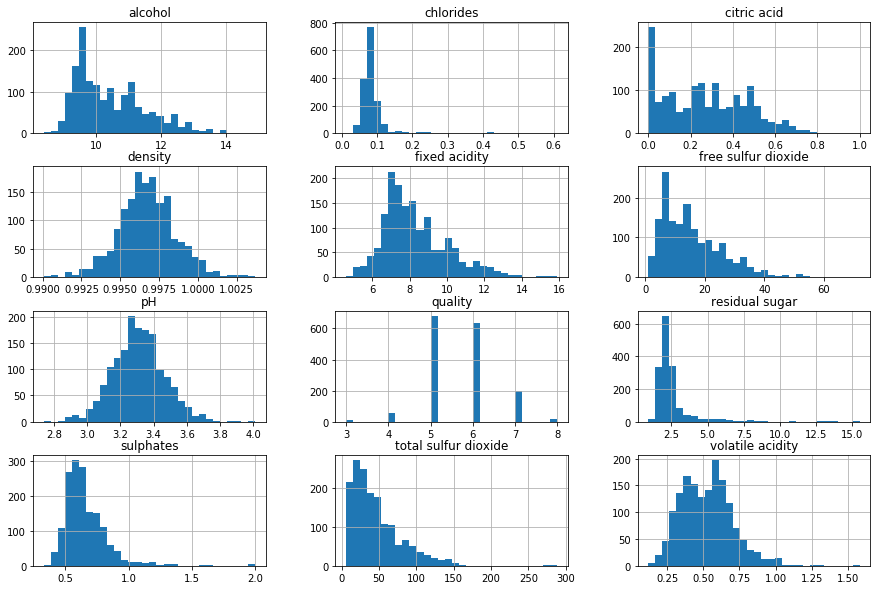

In [8]:
red.hist(bins=30, figsize=(15, 10))

(12, 0)

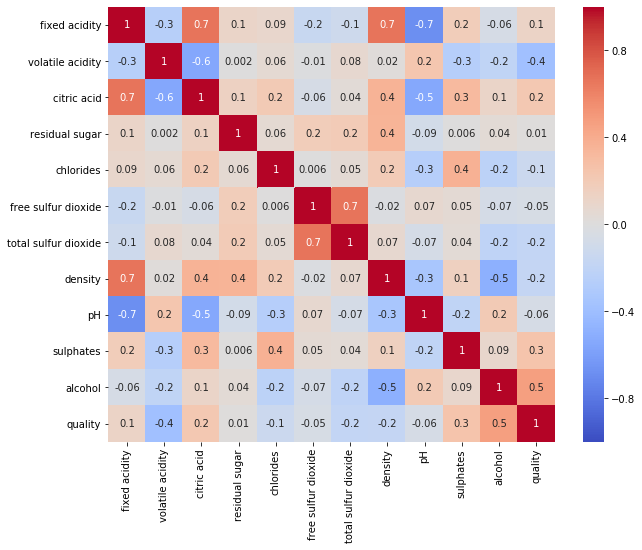

In [9]:
plt.figure(figsize=(10, 8))
ax=sns.heatmap(red.corr(), annot = True,vmin=-1, vmax=1,fmt='.1g',center= 0,cmap= 'coolwarm')
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(12, 0)


In [63]:
def qcode(quality):
    if quality>=6.5:
        return 2
    elif quality>=4.5:
        return 1
    else:
        return 0

In [64]:
red['q_code']=red['quality'].apply(qcode)

/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


([<matplotlib.patches.Wedge at 0x1a2a860f90>,
 [Text(-0.9377065067852735, 0.5750708713998303, 'Great'),
  Text(0.8595331711569837, -0.68644207889728, 'Good'),
  Text(1.0915842653351393, -0.1358079219808043, 'Fair')])

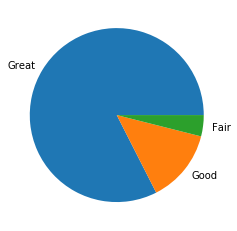

In [65]:
fig = plt.figure(figsize =(6, 4))
plt.pie(red['q_code'].value_counts(),labels=['Great','Good','Fair']) 

In [66]:
x=red.drop(['quality','Color','q_code'],axis=1).values
y=red['q_code'].values

In [14]:
x=StandardScaler().fit_transform(x)

In [15]:
from sklearn.decomposition import PCA

In [16]:
cov_mat = np.cov(x.transpose()) 
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)
print('\nEigenvectors \n%s' % eigen_vecs)


Eigenvalues 
[3.10107182 1.92711489 1.55151379 1.21399175 0.95989238 0.05959558
 0.18144664 0.34485779 0.42322138 0.58415655 0.66002104]

Eigenvectors 
[[ 0.48931422 -0.11050274 -0.12330157 -0.22961737 -0.08261366 -0.63969145
  -0.24952314  0.19402091 -0.17759545 -0.35022736  0.10147858]
 [-0.23858436  0.27493048 -0.44996253  0.07895978  0.21873452 -0.0023886
   0.36592473 -0.1291103  -0.07877531 -0.5337351   0.41144893]
 [ 0.46363166 -0.15179136  0.23824707 -0.07941826 -0.05857268  0.0709103
   0.62167708 -0.38144967 -0.37751558  0.10549701  0.06959338]
 [ 0.14610715  0.27208024  0.10128338 -0.37279256  0.73214429 -0.18402996
   0.09287208  0.00752295  0.29984469  0.29066341  0.04915555]
 [ 0.21224658  0.14805156 -0.09261383  0.66619476  0.2465009  -0.05306532
  -0.21767112  0.11133867 -0.35700936  0.37041337  0.30433857]
 [-0.03615752  0.51356681  0.42879287 -0.04353782 -0.15915198  0.05142086
   0.24848326  0.63540522 -0.2047805  -0.11659611 -0.01400021]
 [ 0.02357485  0.56948696  

In [67]:
tot=sum(eigen_vals)
var_exp=[(i/tot)for i in sorted(eigen_vals, reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('\nVariance explained\n%s'%var_exp)
print('\nCumulative variance explained\n%s'%cum_var_exp)


Variance explained
[0.28173931278845166, 0.17508269905390725, 0.1409584989800498, 0.11029386641613921, 0.0872083701224993, 0.059964387715246516, 0.053071929017561525, 0.038450609059750125, 0.03133110152896331, 0.01648483332441732, 0.005414391993013964]

Cumulative variance explained
[0.28173931 0.45682201 0.59778051 0.70807438 0.79528275 0.85524714
 0.90831906 0.94676967 0.97810077 0.99458561 1.        ]


(1.01, 0)

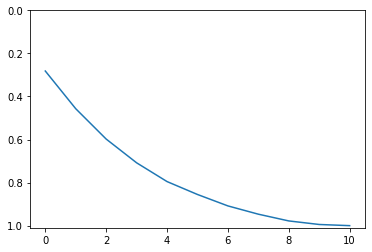

In [68]:
plt.plot(cum_var_exp)
plt.ylim(1.01, 0)

In [69]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
PCAdf = pd.DataFrame(data = principalComponents
, columns = ['PC1', 'PC2','PC3','PC4','PC5'])

In [70]:
print(PCAdf)
pca.explained_variance_ratio_

            PC1        PC2       PC3       PC4       PC5
0    -13.224905  -2.023900 -1.126821 -0.399233 -1.085389
1     22.037724   4.408322 -0.310378 -0.199938 -0.557109
2      7.162673  -2.501461 -0.581868 -0.219069 -0.552934
3     13.430063  -1.951122  2.634040 -1.574059 -0.063806
4    -13.224905  -2.023900 -1.126821 -0.399233 -1.085389
...         ...        ...       ...       ...       ...
1594   1.129111  16.313102 -1.860069 -0.257109 -0.200974
1595   9.489984  21.627525 -1.986558 -0.027199  0.443711
1596  -3.431354  14.271243 -1.750719  0.174652  0.236271
1597   1.132878  16.316167 -2.134414 -0.235388 -0.519028
1598  -3.874377   3.126348 -1.874149  1.700674  0.104330

[1599 rows x 5 columns]


array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04])

In [71]:
pca_red=pd.concat([PCAdf,red['q_code']],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a975190>,
      dtype=object)

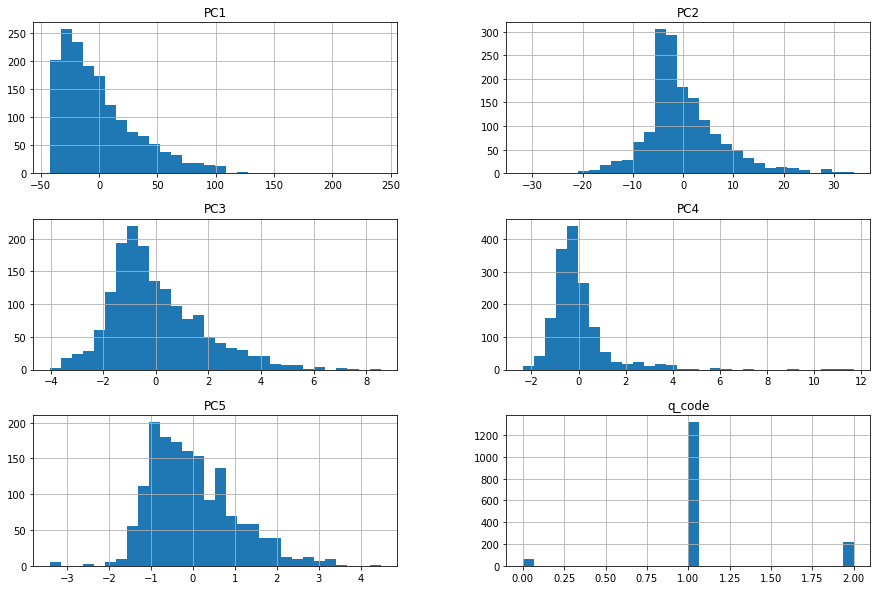

In [72]:
pca.components_
pca_red.hist(bins=30, figsize=(15, 10))

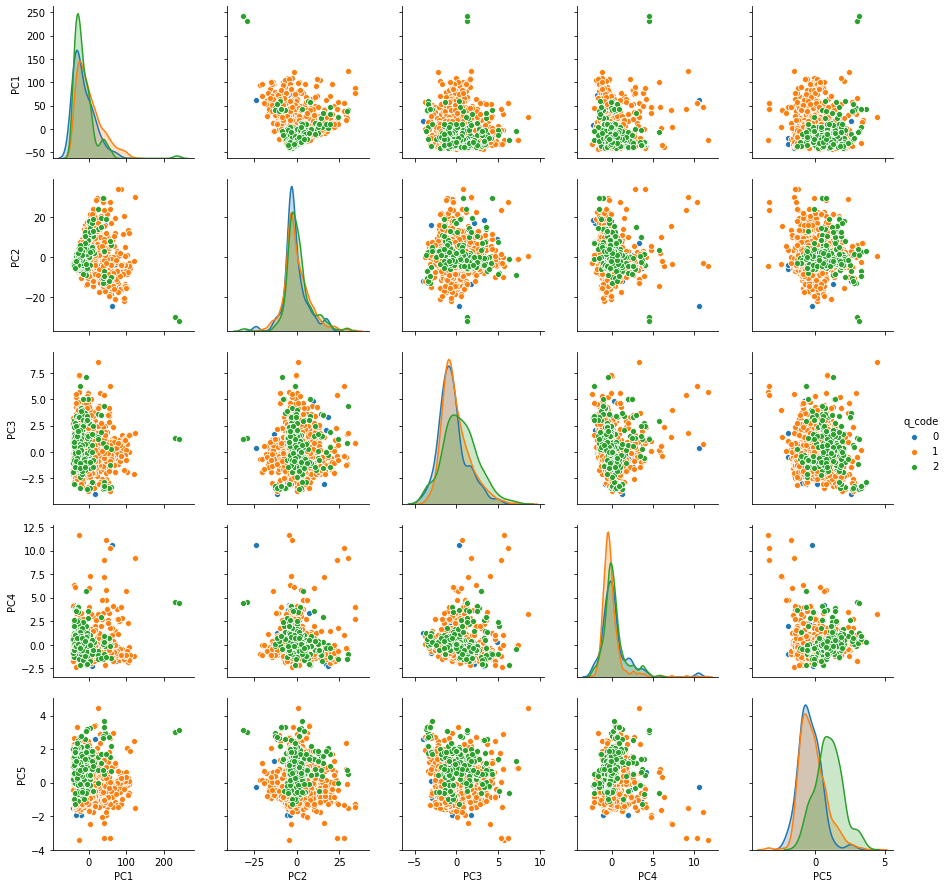

In [73]:
sns.pairplot(vars=['PC1','PC2','PC3','PC4','PC5'], data=pca_red,hue='q_code')

In [74]:
x=pca_red.drop(['q_code'],axis=1).values
y=pca_red['q_code'].values

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
pred_redlr=logisticRegr.predict(x_test)
print(classification_report(y_test, pred_redlr, digits=3))


              precision    recall  f1-score   support

           0      0.000     0.000     0.000        23
           1      0.861     0.970     0.912       402
           2      0.556     0.273     0.366        55

    accuracy                          0.844       480
   macro avg      0.472     0.414     0.426       480
weighted avg      0.785     0.844     0.806       480



/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(4, -1)

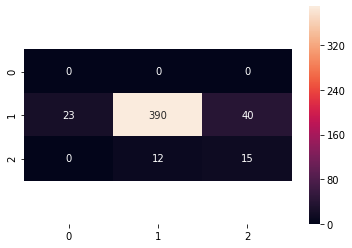

In [77]:
from sklearn.metrics import confusion_matrix, classification_report,precision_score
logcon=confusion_matrix(pred_redlr, y_test)
ax=sns.heatmap(logcon, annot=True,fmt="d")
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(4, -1)

In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

In [80]:
lda=LinearDiscriminantAnalysis()
model=lda.fit(x_train, y_train.ravel())
pred_lday=model.predict(x_test)
print(model.priors_)
print 
print(classification_report(y_test, pred_lday, digits=3))

[0.0357462  0.81948168 0.14477212]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        23
           1      0.866     0.950     0.906       402
           2      0.474     0.327     0.387        55

    accuracy                          0.833       480
   macro avg      0.447     0.426     0.431       480
weighted avg      0.780     0.833     0.803       480



(4, -1)

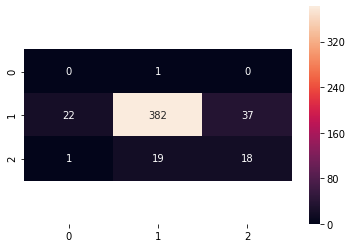

In [81]:
ldacon=confusion_matrix(pred_lday, y_test)
ax=sns.heatmap(ldacon, annot=True,fmt="d")
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(4, -1)

In [82]:
print(classification_report(y_test, pred_lday, digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        23
           1      0.866     0.950     0.906       402
           2      0.474     0.327     0.387        55

    accuracy                          0.833       480
   macro avg      0.447     0.426     0.431       480
weighted avg      0.780     0.833     0.803       480



In [83]:
qda=QuadraticDiscriminantAnalysis()
model2=qda.fit(x_train, y_train.ravel())
pred_qday=model2.predict(x_test)
print(model.priors_)
print(classification_report(y_test, pred_qday, digits=3))

[0.0357462  0.81948168 0.14477212]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        23
           1      0.866     0.930     0.897       402
           2      0.432     0.345     0.384        55

    accuracy                          0.819       480
   macro avg      0.433     0.425     0.427       480
weighted avg      0.775     0.819     0.795       480



(4, -1)

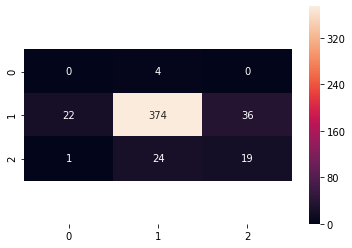

In [94]:
qdacon=confusion_matrix(pred_qday, y_test)
ax=sns.heatmap(qdacon, annot=True,fmt="d")
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(4, -1)

In [35]:
df=pd.read_csv('./winequality-total.csv')
df.head()
red=df.loc[df.Color=='Red']
red.head()
red['q_code']=red['quality'].apply(qcode)

/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [36]:
x=red.drop(['quality','Color','q_code'],axis=1).values
y=red['q_code'].values

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [38]:
model3=qda.fit(x_train, y_train.ravel())
pred_qday2=model3.predict(x_test)
print(model.priors_)

[0.4593387 0.5406613]


(4, -1)

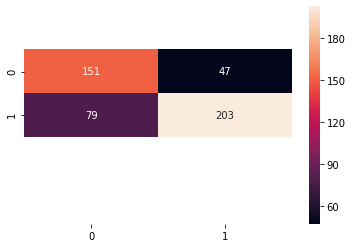

In [39]:
qdacon2=confusion_matrix(pred_qday2, y_test)
ax=sns.heatmap(qdacon2, annot=True,fmt="d")
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(4, -1)

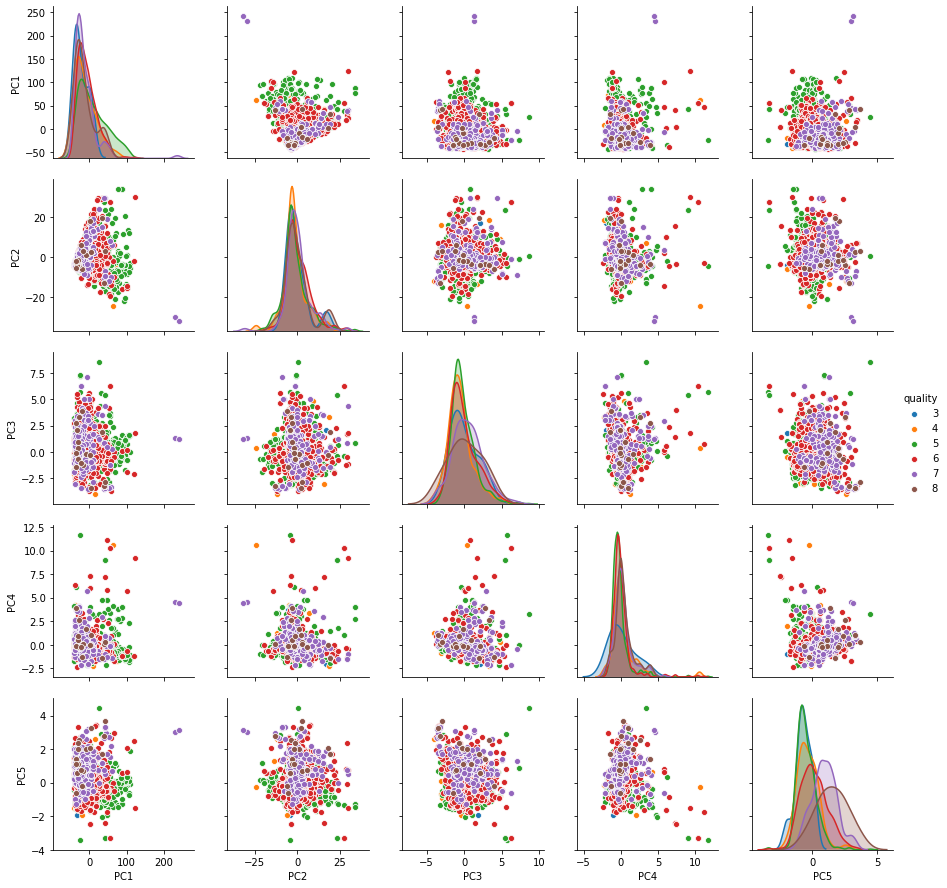

In [106]:
pca_red=pd.concat([PCAdf,red['quality']],axis=1)
sns.pairplot(vars=['PC1','PC2','PC3','PC4','PC5'], data=pca_red,hue='quality')


In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

In [111]:
x=pca_red.drop(['quality'],axis=1).values
y=pca_red['quality'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
qda=QuadraticDiscriminantAnalysis()
model2=qda.fit(x_train, y_train.ravel())
pred_qday=model2.predict(x_test)
print(model.priors_)


[0.0357462  0.81948168 0.14477212]


              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000        21
           5      0.651     0.749     0.697       207
           6      0.554     0.579     0.566       195
           7      0.407     0.212     0.278        52
           8      0.000     0.000     0.000         3

    accuracy                          0.581       480
   macro avg      0.269     0.257     0.257       480
weighted avg      0.550     0.581     0.561       480



/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(4, -1)

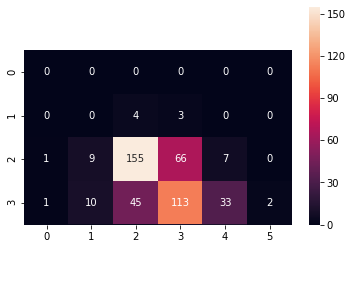

In [112]:
print(classification_report(y_test, pred_qday, digits=3))
qdacon=confusion_matrix(pred_qday, y_test)
ax=sns.heatmap(qdacon, annot=True,fmt="d")
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(4, -1)

[0.00714924 0.02859696 0.42359249 0.39588919 0.13136729 0.01340483]
              precision    recall  f1-score   support

           3      0.000     0.000     0.000         2
           4      0.000     0.000     0.000        21
           5      0.628     0.749     0.683       207
           6      0.523     0.523     0.523       195
           7      0.429     0.288     0.345        52
           8      0.000     0.000     0.000         3

    accuracy                          0.567       480
   macro avg      0.263     0.260     0.258       480
weighted avg      0.530     0.567     0.544       480



/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(4, -1)

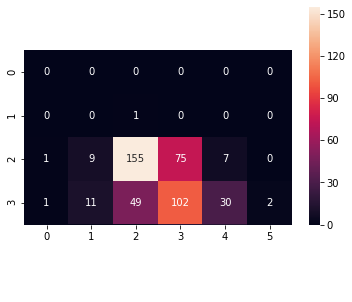

In [114]:
lda=LinearDiscriminantAnalysis()
model=lda.fit(x_train, y_train.ravel())
pred_lday=model.predict(x_test)
print(model.priors_)
print(classification_report(y_test, pred_lday, digits=3))

ldacon=confusion_matrix(pred_lday, y_test)
ax=sns.heatmap(ldacon, annot=True,fmt="d")
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(4, -1)

mean CV error rate: 0.77
Accuracy (interval): 0.77 (+/- 0.12)
[[   1   12    0]
 [  58 1165  145]
 [   4  142   72]]
              precision    recall  f1-score   support

           0      0.077     0.016     0.026        63
           1      0.852     0.883     0.867      1319
           2      0.330     0.332     0.331       217

    accuracy                          0.774      1599
   macro avg      0.420     0.410     0.408      1599
weighted avg      0.750     0.774     0.761      1599



(4, -1)

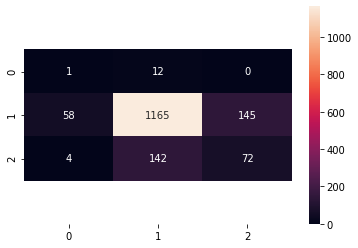

In [103]:
from sklearn.model_selection import cross_val_score #get CV scores
scores = cross_val_score(qda, x, y.ravel(), cv=5)
scores #report several summary measures for CV classification accuracy
print("mean CV error rate: %.2f" % scores.mean()) 
print("Accuracy (interval): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))
from sklearn.model_selection import cross_val_predict
CVpred_QDA = cross_val_predict(qda, x, y.ravel(), cv=5)
print(confusion_matrix(CVpred_QDA, y))

print(classification_report(y, CVpred_QDA, digits=3))
CVQ=confusion_matrix(CVpred_QDA, y)
ax=sns.heatmap(CVQ, annot=True,fmt="d")
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(4, -1)

mean CV error rate: 0.81
Accuracy (interval): 0.81 (+/- 0.07)
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        63
           1      0.851     0.937     0.892      1319
           2      0.418     0.281     0.336       217

    accuracy                          0.811      1599
   macro avg      0.423     0.406     0.409      1599
weighted avg      0.758     0.811     0.781      1599



/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


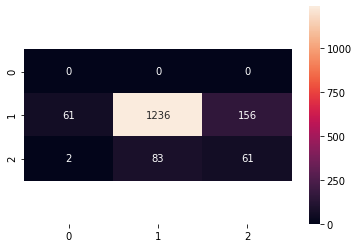

In [104]:
scores = cross_val_score(lda, x, y.ravel(), cv=5)
scores #report several summary measures for CV classification accuracy
print("mean CV error rate: %.2f" % scores.mean()) 
print("Accuracy (interval): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))
CVpred_LDA = cross_val_predict(lda, x, y.ravel(), cv=5)
CVL=confusion_matrix(CVpred_LDA, y)
ax=sns.heatmap(CVL, annot=True,fmt="d")
ax.get_ylim()
(5.5, 0.5)
ax.set_ylim(4, -1)
print(classification_report(y, CVpred_LDA, digits=3))

In [115]:
def qcode(quality):
    if quality>=6:
        return 1
    else:
        return 0

In [116]:
red['q_code']=red['quality'].apply(qcode)

/Users/petergu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


([<matplotlib.patches.Wedge at 0x1a2d732e50>,
 [Text(-0.11970888023405774, 1.0934668646068377, 'Good'),
  Text(0.11970898261181326, -1.0934668533988787, 'Fair')])

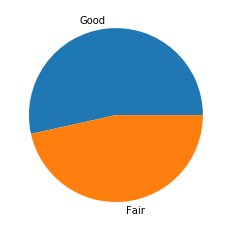

In [117]:
fig = plt.figure(figsize =(6, 4))
plt.pie(red['q_code'].value_counts(),labels=['Good','Fair'])

In [118]:
x=red.drop(['quality','Color','q_code'],axis=1).values
y=red['q_code'].values

In [119]:
x=StandardScaler().fit_transform(x)

In [120]:
from sklearn.decomposition import PCA

In [121]:
cov_mat = np.cov(x.transpose()) 
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)
print('\nEigenvectors \n%s' % eigen_vecs)


Eigenvalues 
[3.10107182 1.92711489 1.55151379 1.21399175 0.95989238 0.05959558
 0.18144664 0.34485779 0.42322138 0.58415655 0.66002104]

Eigenvectors 
[[ 0.48931422 -0.11050274 -0.12330157 -0.22961737 -0.08261366 -0.63969145
  -0.24952314  0.19402091 -0.17759545 -0.35022736  0.10147858]
 [-0.23858436  0.27493048 -0.44996253  0.07895978  0.21873452 -0.0023886
   0.36592473 -0.1291103  -0.07877531 -0.5337351   0.41144893]
 [ 0.46363166 -0.15179136  0.23824707 -0.07941826 -0.05857268  0.0709103
   0.62167708 -0.38144967 -0.37751558  0.10549701  0.06959338]
 [ 0.14610715  0.27208024  0.10128338 -0.37279256  0.73214429 -0.18402996
   0.09287208  0.00752295  0.29984469  0.29066341  0.04915555]
 [ 0.21224658  0.14805156 -0.09261383  0.66619476  0.2465009  -0.05306532
  -0.21767112  0.11133867 -0.35700936  0.37041337  0.30433857]
 [-0.03615752  0.51356681  0.42879287 -0.04353782 -0.15915198  0.05142086
   0.24848326  0.63540522 -0.2047805  -0.11659611 -0.01400021]
 [ 0.02357485  0.56948696  

In [122]:
tot=sum(eigen_vals)
var_exp=[(i/tot)for i in sorted(eigen_vals, reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('\nVariance explained\n%s'%var_exp)
print('\nCumulative variance explained\n%s'%cum_var_exp)


Variance explained
[0.28173931278845166, 0.17508269905390725, 0.1409584989800498, 0.11029386641613921, 0.0872083701224993, 0.059964387715246516, 0.053071929017561525, 0.038450609059750125, 0.03133110152896331, 0.01648483332441732, 0.005414391993013964]

Cumulative variance explained
[0.28173931 0.45682201 0.59778051 0.70807438 0.79528275 0.85524714
 0.90831906 0.94676967 0.97810077 0.99458561 1.        ]
